In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = load_breast_cancer()

In [5]:
x = data.data
y = data.target

In [6]:
lr1 = LogisticRegression(penalty='l1', solver='liblinear', C=.5, max_iter=1000)
lr2 = LogisticRegression(penalty='l2', solver='liblinear', C=.5, max_iter=1000)

In [9]:
lr1.fit(x, y)
lr2.fit(x, y)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
#查看逻辑回归每个特征对应的参数
lr1.coef_

array([[ 3.99740768,  0.03193645, -0.13677687, -0.01621841,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50484928,  0.        , -0.07127663,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24575323, -0.12846797, -0.01441062,  0.        ,
         0.        , -2.04410239,  0.        ,  0.        ,  0.        ]])

In [17]:
(lr1.coef_ != 0).sum()

10

In [16]:
(lr2.coef_ != 0).sum()

30

In [24]:
#画出L1和L2的学习曲线来对比
L1score_tr = []
L1score_te = []
L2score_tr = []
L2score_te = []
xtrain, xtest, ytrain, ytest = train_test_split(x, y)
for i in np.linspace(0.05, 1, 19):#在0.05到1之间选取19个数字
    lrl1 = LogisticRegression(penalty='l1', solver='liblinear', C=i, max_iter=1000)
    lrl2 = LogisticRegression(penalty='l2', solver='liblinear', C=i, max_iter=1000)
    lrl1.fit(xtrain, ytrain)
    lrl2.fit(xtrain, ytrain)
    L1score_tr.append(accuracy_score(lrl1.predict(xtrain), ytrain))
    L1score_te.append(accuracy_score(lrl1.predict(xtest), ytest))
    L2score_tr.append(accuracy_score(lrl2.predict(xtrain), ytrain))
    L2score_te.append(accuracy_score(lrl2.predict(xtest), ytest))

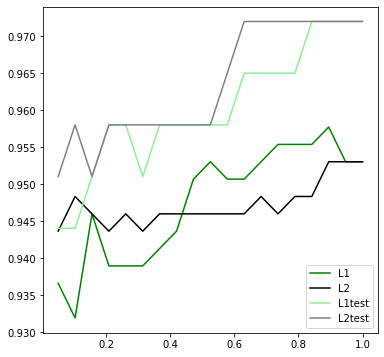

In [27]:
graph = [L1score_tr, L2score_tr, L1score_te, L2score_te]
color = ['green', 'black', 'lightgreen', 'gray']
label = ['L1', 'L2', 'L1test', 'L2test']
plt.figure(figsize=[6,6])
for i in range(0, 4):
    plt.plot(np.linspace(0.05, 1, 19), graph[i], color[i], label=label[i])
    plt.legend(loc=4)#指出下标的位置在哪里，默认左上角，4则代表右下角
plt.show()

## 逻辑回归中的特征选择
一般对特征进行清洗，而后选择</p>一般对于逻辑回归而言不用PCA和SVD，因为缺乏可解释性

In [28]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## 使用潜入法Embedded来选择特征

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = load_breast_cancer()
LR = LogisticRegression(penalty='l2', solver='liblinear', C=.9, random_state=420)
score_ = cross_val_score(LR, data.data, data.target, cv=10).mean()
x_embedded = SelectFromModel(estimator=LR, norm_order=1).fit_transform(data.data, data.target)
x_embedded.shape

(569, 9)

In [34]:
score_

0.9508145363408522

In [36]:
cross_val_score(LR, x_embedded, y, cv=10).mean()

0.9368107769423559

In [37]:
#如何使得效果更好
#改变SelectFromModel的门槛值来筛选特征重要值

In [38]:
threshold = LR.fit(data.data, data.target).coef_

In [40]:
#由于在逻辑回归中重要性在回归系数中体现，因而重要性门槛在
#逻辑回归重要性的max值之间选择
threshold

array([[ 2.04828506e+00,  1.13949135e-01, -5.37249403e-02,
        -3.07869489e-03, -1.47049397e-01, -3.90471960e-01,
        -6.23291295e-01, -3.26992364e-01, -2.14937386e-01,
        -2.50489446e-02, -1.79583450e-02,  1.20062544e+00,
         3.14754506e-02, -9.50620651e-02, -1.60852341e-02,
         1.66511786e-03, -4.88292522e-02, -3.86233127e-02,
        -4.05130496e-02,  5.64106122e-03,  1.26257281e+00,
        -3.35753532e-01, -1.27853932e-01, -2.41403548e-02,
        -2.72165942e-01, -1.10559135e+00, -1.53602860e+00,
        -6.29209259e-01, -6.59420601e-01, -1.10964418e-01]])

(0.0, 30)
(0.10780447680934656, 17)
(0.21560895361869312, 12)
(0.32341343042803966, 11)
(0.43121790723738623, 8)
(0.5390223840467327, 8)
(0.6468268608560793, 6)
(0.7546313376654259, 5)
(0.8624358144747725, 5)
(0.970240291284119, 5)
(1.0780447680934655, 5)
(1.1858492449028122, 4)
(1.2936537217121586, 2)
(1.4014581985215053, 2)
(1.5092626753308518, 2)
(1.6170671521401985, 1)
(1.724871628949545, 1)
(1.8326761057588914, 1)
(1.940480582568238, 1)
(2.0482850593775845, 1)


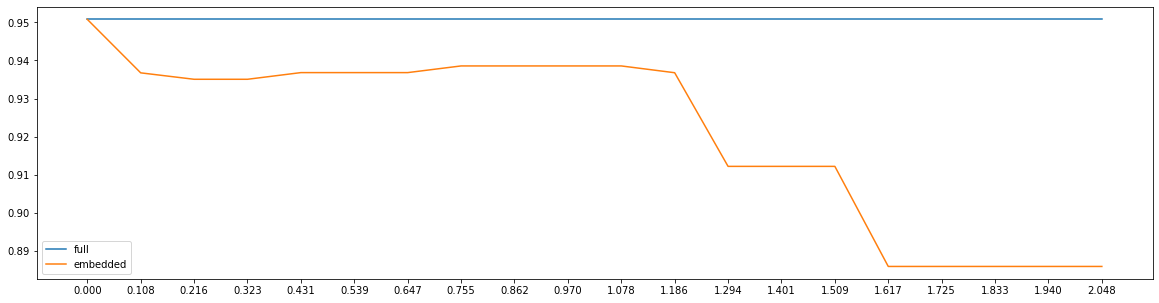

In [45]:
full_x = []
embed_x = []
k = 0
threshold = np.linspace(0, abs(threshold).max(), 20)
for i in threshold:
    x_embedded = SelectFromModel(LR, threshold=i).fit_transform(data.data, data.target)
    full_x.append(cross_val_score(LR, data.data, data.target,cv=10).mean())
    embed_x.append(cross_val_score(LR, x_embedded, data.target, cv=10).mean())
    print((threshold[k], x_embedded.shape[1]))
    k+=1
plt.figure(figsize=(20, 5))
plt.plot(threshold, full_x, label="full")
plt.plot(threshold, embed_x, label="embedded")
plt.xticks(threshold)
plt.legend()
plt.show()

(0.0, 30)
(0.005684210526315789, 27)
(0.011368421052631578, 27)
(0.017052631578947368, 26)
(0.022736842105263156, 25)
(0.028421052631578944, 23)
(0.034105263157894736, 22)
(0.03978947368421052, 21)
(0.04547368421052631, 20)
(0.051157894736842104, 19)
(0.05684210526315789, 18)
(0.06252631578947368, 18)
(0.06821052631578947, 18)
(0.07389473684210526, 18)
(0.07957894736842104, 18)
(0.08526315789473683, 18)
(0.09094736842105262, 18)
(0.09663157894736842, 17)
(0.10231578947368421, 17)
(0.108, 17)


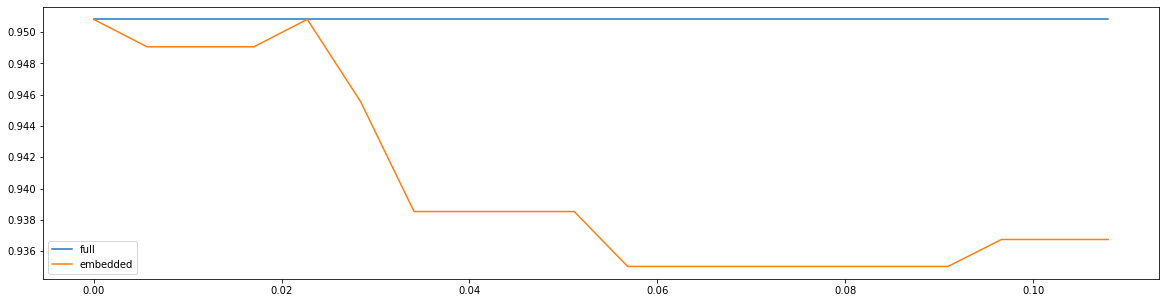

In [50]:
full_x = []
embedded_x = []
thresh = np.linspace(0 ,0.108, 20)
k = 0
for i in thresh:
    x_em = SelectFromModel(LR, threshold=i).fit_transform(data.data, data.target)
    full_x.append(cross_val_score(LR, data.data, data.target, cv=10).mean())
    embedded_x.append(cross_val_score(LR, x_em, data.target, cv=10).mean())
    print((thresh[k], x_em.shape[1]))
    k += 1
plt.figure(figsize=(20, 5))
plt.plot(thresh, full_x, label="full")
plt.plot(thresh, embedded_x, label="embedded")
plt.legend()
plt.show()

## 对C调整学习曲线 

0.8822994987468672 0.01 8
0.9244987468671677 0.51 8
0.9368107769423559 1.01 9
0.9438283208020051 1.51 9
0.9473370927318296 2.01 9
0.9473370927318296 2.01 9
0.9473370927318296 2.01 9
0.9508458646616542 3.51 10
0.9526002506265664 4.01 9
0.9543546365914788 4.51 10
0.9543546365914788 4.51 9
0.9543546365914788 4.51 10
0.9543546365914788 4.51 9
0.9543546365914788 4.51 9
0.9543546365914788 4.51 9
0.9543546365914788 4.51 10
0.9561090225563911 8.01 9
0.9561090225563911 8.01 10
0.9561090225563911 8.01 10
0.9561090225563911 8.01 10


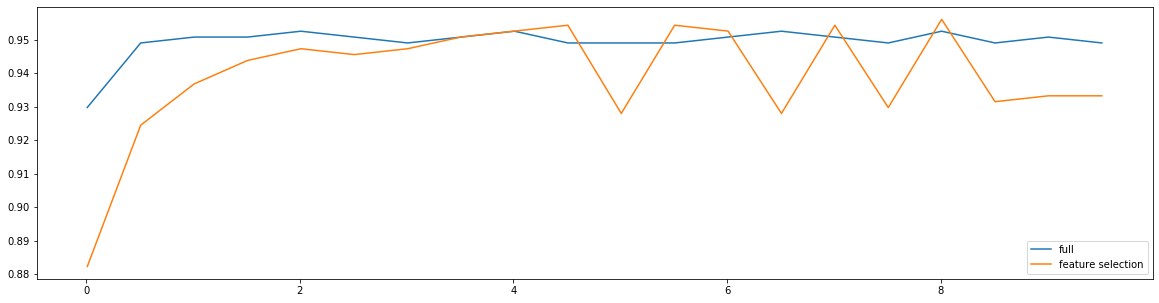

In [53]:
fullx = []
fsx = []
C = np.arange(0.01, 10.01, 0.5)
for c in C:
    LR_ = LogisticRegression(solver='liblinear', C=c, random_state=420)
    fullx.append(cross_val_score(LR_, data.data, data.target, cv=10).mean())
    xembedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data, data.target)
    fsx.append(cross_val_score(LR_, xembedded, data.target, cv=10).mean())
    print(max(fsx), C[fsx.index(max(fsx))], xembedded.shape[1])
plt.figure(figsize=(20, 5))
plt.plot(C, fullx, label='full')
plt.plot(C, fsx, label='feature selection')
plt.legend()
plt.show()

## 重要参数max_iter 
使用梯度下降法迭代最大次数

## 二元回归与多元回归 
multi_class 处理分类问题类型， ovr则为二分类，也为一对多</p>
multinomial 多分类问题

## solver求解方法
liblinear:梯度下降法</p>
lbfgs:拟牛顿法一种</p>
newton-cg:牛顿法一种</p>
sag:随机平均梯度下降</p>
saga:

In [56]:
from sklearn.datasets import load_iris

In [57]:
iris = load_iris()
for multi in ('multinomial', 'ovr'):
    lr = LogisticRegression(solver='sag', max_iter=100, random_state=2
                           , multi_class = multi).fit(iris.data, iris.target)
    print("training score: % .3f(%s)"%(lr.score(iris.data,iris.target), multi))

training score:  0.987(multinomial)
training score:  0.960(ovr)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [59]:
lr1 = LogisticRegression(solver='sag', max_iter=100, random_state=20
                        , multi_class='multinomial').fit(iris.data, iris.target)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [60]:
lr1.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 样本不平衡与参数 